<a href="https://colab.research.google.com/github/juandaantoniusapakpahan/TA-03/blob/main/Copy_of_Overview_of_Colaboratory_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cells
A notebook is a list of cells. Cells contain either explanatory text or executable code and its output. Click a cell to select it.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:

import matplotlib.pyplot as plt
import itertools  
from wordcloud import WordCloud, STOPWORDS
import tensorflow as tf
import tensorflow_hub as hub

import time


import tensorflow.keras.preprocessing.text as kpt
from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split
import numpy as np
import json
import re

import nltk
import json
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd

In [ ]:
df1 = pd.read_csv('/content/gdrive/My Drive/Tugas Akhir 1/Data/data.csv')
df2 = pd.read_csv('/content/gdrive/My Drive/Tugas Akhir 1/Data/news.csv')

In [ ]:
#Penampakan dataset 1
df1.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


Data **Reduction** **bold text**

**Data 1**

In [ ]:
df1_cpy = df1.copy()
remove_att1 = [0]
#index 0 merupakan atribut 'URLs' pada dasatet 1

columns1 = [x for x in range(df1_cpy.shape[1]) if x not in remove_att1]
#menyimpan kolom atau index yang tidak dihapus

dataset1 = df1_cpy.iloc[:, columns1]
#menghapus kolom dengan nomor index menggunakan iloc selection

print(dataset1.shape)
dataset1.head()


(4009, 3)


,Headline,Body,Label
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


**Data 2**

In [ ]:
df2_cpy= df2.copy()
remove_att2 = [0]
#index 0 ([0]) meripakan atribut id

columns2 = [i for i in range(df2_cpy.shape[1]) if i not in remove_att2 ] 
#menyimpan kolom atau index yang tidak dihapus

dataset2 = df2_cpy.iloc[:, columns2] 
#menghapus kolom dengan nomor index menggunakan iloc selection

print(dataset2.shape)

dataset2.head()

(6335, 3)


,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


**Data Cleaning**

In [ ]:
#data 1
dataset1_copy = dataset1.copy()
jlh_columns = 0
#menampung jumlah kolom yang memiliki nilai null

for i in dataset1_copy.columns:
    if dataset1_copy[i].isnull().sum():
        jlh_columns = jlh_columns + 1
    else:
        jlh_columns = jlh_columns
        
if jlh_columns != 0:
    data1_clean =dataset1_copy.dropna(axis = 0)
    
print("Sebelum Proses Cleaning:\n",dataset1.shape)
print('\n')
print("Setelah Proses Cleaning:\n",data1_clean.shape) 

Sebelum Proses Cleaning:
 (4009, 3)


Setelah Proses Cleaning:
 (3988, 3)


In [ ]:
#data 2
dataset2_copy = dataset2.copy()
jlh_column = 0
#menampung jumlah kolom yang memiliki nilai null

for j in dataset2_copy.columns:
    if dataset2_copy[j].isnull().sum():
        jlh_column = jlh_column + 1
    else:
        jlh_column = jlh_column
    
if jlh_column != 0:
    data2_clean = dataset2_copy.dropna(axis=0)
else: 
    data2_clean = dataset2_copy
    
print("Sebelum Proses Cleaning:\n",dataset2.shape)
print('\n')
print('Setelah Prses Cleaning:\n',data2_clean.shape)

Sebelum Proses Cleaning:
 (6335, 3)


Setelah Prses Cleaning:
 (6335, 3)


**Data Transformation**

In [ ]:
#data 1
data1_transfor = data1_clean.copy()
ht = 0

for k in data1_transfor['Label']:
    if k == 'FAKE':
        data1_transfor['Label'].iloc[ht] = 1
    elif k == 'REAL':
        data1_transfor['Label'].iloc[ht] = 0
    elif k == 0:
        data1_transfor['Label'].iloc[ht] = 0
    else :
        data1_transfor['Label'].iloc[ht] = 1
    ht = ht + 1

data1_transfor.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Headline,Body,Label
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [ ]:
#data 2
data2_transfor = data2_clean.copy()
ht = 0

for k in data2_transfor['label']:
    if k == 'FAKE':
        data2_transfor['label'].iloc[ht] = 1
    elif k == 'REAL':
        data2_transfor['label'].iloc[ht] = 0
    elif k == 0:
        data2_transfor['label'].iloc[ht] = 0
    else :
        data2_transfor['label'].iloc[ht] = 1
    ht = ht + 1

data2_transfor.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


**Data Integration**

In [ ]:
att_name = ['title', 'content', 'label'] #nama atribut untuk kedua dataset

df1_ = data1_transfor.copy()
df2_ = data2_transfor.copy()
df1_.columns = att_name
df2_.columns = att_name

#merge dataset
df_ = [df1_,df2_]
df_merge = pd.concat(df_)
print(df_merge.shape)
df_merge.head()

(10323, 3)


,title,content,label
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


**Contractions**

In [ ]:
#news content
from nltk.tokenize.treebank import TreebankWordDetokenizer
dt = []
df_merge['content_contract']= df_merge['content'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize)
for i in df_merge['content_contract']:
    dt.append(TreebankWordDetokenizer().detokenize(i))

In [ ]:
#news title
dtj = []
df_merge['judul_contract']= df_merge['title'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize)
for j in df_merge['judul_contract']:
    dtj.append(TreebankWordDetokenizer().detokenize(j))

In [ ]:
pip install contractions

     |████████████████████████████████| 266kB 4.4MB/s 
     |████████████████████████████████| 327kB 5.5MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.1-cp37-cp37m-linux_x86_64.whl size=85264 sha256=d5e3ac8a39e23b8b5b436025e900c4c0ba0a92c23bce4d132a637673b7545ade
  Stored in directory: /root/.cache/pip/wheels/e4/ab/f7/cb39270df8f6126f3dd4c33d302357167086db460968cfc80c
Successfully built pyahocorasick


In [ ]:
import contractions 
cttnc = dt.copy()
cttnj = dtj.copy()
dt1c_contract = []
dt1j_contract = []

#news content
for line in cttnc:
    isi = contractions.fix(line)
    dt1c_contract.append(isi)
    
#news title
for lines in cttnj:
    isii = contractions.fix(lines)
    dt1j_contract.append(isii)

**Remove URL**

In [ ]:
#remove
conten_rUrl = []
for line_rurl in dt1c_contract:
    konten_url = re.sub(r"http\S+", "", line_rurl)
    conten_rUrl.append(konten_url)
    
judul_rUrl = []
for line_conten in dt1j_contract:
    judul_url = re.sub(r"http\S+", "", line_conten)
    judul_rUrl.append(judul_url)

**Punctuation Removal**

In [ ]:
def check_punc_char(content, punctuation):
    konten = []
    no_punc = ""
    for char in content:
        if char not in punctuation:
            no_punc = no_punc + char
    konten.append(no_punc)
    return konten


data1 = conten_rUrl.copy()
data2 = judul_rUrl.copy()
punctuations = '''!()-—[]{};:'"\,<>./?@#$%^&*_~'''
konten_pr = []
title_pr = []

#news content
for i in data1:
    data_no_punc = check_punc_char(i, punctuations)
    konten_pr.append(data_no_punc)

#news title
for i in data2:
    data_no_punc = check_punc_char(i, punctuations)
    title_pr.append(data_no_punc)


**Case Folding**

In [ ]:
#News Content
konten_cafo = []
i = 0
for line in range(len(konten_pr)):
    data = konten_pr[line][i].lower()
    konten_cafo.append(data)
    
#news Title
judul_cafo = []
for neli in range(len(title_pr)):
    jdl = title_pr[neli][i].lower()
    judul_cafo.append(jdl)

**Tokenisasi**

In [ ]:
berita = konten_cafo.copy()
konten_split = []
for line in range(len(berita)):
    data_sp = re.findall("[\w']+",str(berita[line]))
    konten_split.append(data_sp)
   # konten_split.append(data_sp)
print(konten_split[:1])

[['image', 'copyright', 'getty', 'images', 'on', 'sunday', 'morning', 'donald', 'trump', 'went', 'off', 'on', 'a', 'twitter', 'tirade', 'against', 'a', 'member', 'of', 'his', 'own', 'party', 'this', 'in', 'itself', 'is', 'not', 'exactly', 'huge', 'news', 'it', 'is', 'far', 'from', 'the', 'first', 'time', 'the', 'president', 'has', 'turned', 'his', 'rhetorical', 'cannons', 'on', 'his', 'own', 'ranks', 'this', 'time', 'however', 'his', 'attacks', 'were', 'particularly', 'biting', 'and', 'personal', 'he', 'essentially', 'called', 'tennessee', 'senator', 'bob', 'corker', 'the', 'chair', 'of', 'the', 'powerful', 'senate', 'foreign', 'relations', 'committee', 'a', 'coward', 'for', 'not', 'running', 'for', 'reelection', 'he', 'said', 'mr', 'corker', 'begged', 'for', 'the', 'presidents', 'endorsement', 'which', 'he', 'refused', 'to', 'give', 'he', 'wrongly', 'claimed', 'that', 'mr', 'corkers', 'support', 'of', 'the', 'iranian', 'nuclear', 'agreement', 'was', 'his', 'only', 'political', 'accomp

In [ ]:
jberita = judul_cafo.copy()
judl_spt = []
for line in range(len(jberita)):
    data_jb = re.findall("[\w']+",str(jberita[line]))
    judl_spt.append(data_jb)
print(judl_spt[:2])

[['four', 'ways', 'bob', 'corker', 'skewered', 'donald', 'trump'], ['linklaters', 'war', 'veteran', 'comedy', 'speaks', 'to', 'modern', 'america', 'says', 'star']]


**Stopword Remove**

In [ ]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

def stopping(sentences):
    text = []
    stopp = stopwords.words('english')
    for tokens in sentences:
        if tokens not in stopp:
            text.append(tokens)
    return text


#news content 
konten_stopp = []
for liness in konten_split:
    sentenc = stopping(liness)
    konten_stopp.append(sentenc)
    
#news title
judul_stopp = []
for row in judl_spt:
    kalimat = stopping(row)
    judul_stopp.append(kalimat)

**Lematization**

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import PorterStemmer
lemmatizer = WordNetLemmatizer()

def lemmati(sentence):
    tokens= []
    for token in sentence:
        word = lemmatizer.lemmatize(token)
        tokens.append(word)
    return tokens
      
#news title
judul_lemma = []
for ln in judul_stopp:
    snt_token = lemmati(ln)
    judul_lemma.append(snt_token)


#news content
konten_lemma = []
for baris in konten_stopp:
    sent_token = lemmati(baris)
    konten_lemma.append(sent_token)

**Word2Vec Gensim**

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [ ]:
#iter    --> jumlah proses yang dilakukan 
#sg      --> asitektur yang digunakan, jika 0 (nol) maka Continuous Bag of Words (CBOW), jika 1 (satu) maka SKIP GRAM
#size    --> merupakan jumlah padding vaktor untuk merepresentasikan satu kata
#window  --> merupakan jarak konteks yang dilihat 
model = Word2Vec(sentences=konten_lemma, size=200, window=2, min_count=1, workers=4, iter= 10, sg=0, hs=0)

In [ ]:
# menyimpan model 
model.save("word2vec.model")
# mengambil model untuk digunakan 
model = Word2Vec.load("word2vec.model")

**Get Embedding**

In [ ]:
content_embedding = []
def get_embedding(content):
    sentence = []
    for token in content:
        token_embed = model.wv[token]
        sentence.append(token_embed)
    return sentence

for line in konten_lemma:
    sentence = get_embedding(line)
    content_embedding.append(sentence)

In [ ]:
#mencari sentence yang paling panjang
max_token_conten = 0
for lines in konten_lemma:
    if len(lines) > max_token_conten:
        max_token_conten = len(lines)

In [ ]:
embedding_ = np.zeros((1,200))
ty = embedding_.tolist()
gas = [np.concatenate((ty, lines), axis=0) for embed in range(max_token_conten - len(lines)) for lines in content_embedding 
       if len(lines) < max_token_conten]

ValueError: ignored

In [ ]:
from keras.preprocessing import sequence
def get_padded_encoded_reviews(encoded_reviews):
    padded_reviews_encoding = []
    for enc_review in encoded_reviews:
        zero_padding_cnt = max_token_conten #- len(enc_review)
        kontenss= sequence.pad_sequences(enc_review, maxlen=zero_padding_cnt)
        padded_reviews_encoding.append(kontenss)
    return padded_reviews_encoding
     


In [ ]:
fix_padding_content = get_padded_encoded_reviews(content_embedding)


In [ ]:
fix_padding_content

In [ ]:
embe = np.zeros((1, 200))
gs = []
for i in range(200):
  gs.append(embe[0])


In [ ]:
aas = np.append(gs,content_embedding[0], axis=0)

In [ ]:
def get_zero_embedding(index_needed, line1):
  embedding_ = np.zeros((1,200))
  indexs = []
  eam = []
  for p in range(index_needed):
    indexs.append(embedding_)
  eam.append(np.append(indexs, line1))
  return eam

def get_padding_embedding(embedding_content, max_token_conten):
    conten_padding_embed = []
    for line1 in embedding_content:
        index_needed = max_token_conten - len(line)
        tmp = get_zero_embedding(index_needed, line1)
        conten_padding_embed.append(tmp)

kontens_= get_padding_embedding(content_embedding, max_token_conten)


In [ ]:
conten_padding_embed[0]

NameError: ignored

In [ ]:
#menyeimbangkan token pada setiap conten berdasarkan jumlah conten dengan token paling banyak
#Pre-Padding --> Meletakkan di awal, contoh: [[1, 2, 3], [3, 4, 5, 6], [3, 4]] ==> [[0, 1, 2, 3], [3, 4, 5, 6], [0, 0, 3, 4]]
def merge_padding(index_needed, line1, embe):
  for num in range(index_needed):
    line1 = np.concatenate((embe,line1), axis=0)
    return line1



def paddiing_embedding(embedding_content):
    conten_padding_embed = []
    for line1 in embedding_content:
        index_needed = max_token_conten - len(line)
        embedding_ = np.zeros((1,200))
        list_embedding = embedding_.tolist()
        embeeding_zeros = []
        for ls in range(index_needed):
          
          
        get = merge_padding(index_needed, line1, list_embedding)
        conten_padding_embed.append(get_)
    return conten_padding_embed
             
konten_padd_embedi = paddiing_embedding(content_embedding)

ValueError: ignored

**Word2Vec Manual**

In [ ]:
#news content
#kosakata (kata unik)
unique_word_conten = []
for line in konten_lemma:
    for token in line:
        if token not in unique_word_conten:
            unique_word_conten.append(token)

In [ ]:
#news title
#Kosakata (kata unik)
unique_word_title = []
for linet in judul_lemma:
    for wordt in linet:
        if wordt not in unique_word_title:
            unique_word_title.append(wordt)

print("Total Kata Unik pada Konten Berita:" ,len(unique_word_conten))
print("Total Kata UNik pada Judul Berita:" ,len(unique_word_title))

Total Kata Unik pada Konten Berita: 101543
Total Kata UNik pada Judul Berita: 12347


In [ ]:
#news content
#jumlah token (kata)
token_size_content = 0
for line in konten_lemma:
    for word in line:
        token_size_content = token_size_content + 1 
print("Banyak Token pada News Content:", token_size_content)

Banyak Token pada News Content: 3881552


In [ ]:
print(konten_lemma[0])

['image', 'copyright', 'getty', 'image', 'sunday', 'morning', 'donald', 'trump', 'went', 'twitter', 'tirade', 'member', 'party', 'exactly', 'huge', 'news', 'far', 'first', 'time', 'president', 'turned', 'rhetorical', 'cannon', 'rank', 'time', 'however', 'attack', 'particularly', 'biting', 'personal', 'essentially', 'called', 'tennessee', 'senator', 'bob', 'corker', 'chair', 'powerful', 'senate', 'foreign', 'relation', 'committee', 'coward', 'running', 'reelection', 'said', 'mr', 'corker', 'begged', 'president', 'endorsement', 'refused', 'give', 'wrongly', 'claimed', 'mr', 'corker', 'support', 'iranian', 'nuclear', 'agreement', 'political', 'accomplishment', 'unlike', 'colleague', 'mr', 'corker', 'free', 'worry', 'immediate', 'political', 'future', 'hold', 'tongue', 'skip', 'twitter', 'post', 'senbobcorker', 'shame', 'white', 'house', 'become', 'adult', 'day', 'care', 'center', 'someone', 'obviously', 'missed', 'shift', 'morning', 'senator', 'bob', 'corker', 'senbobcorker', 'october', '

In [ ]:
['image', 'copyright', 'getty', 'image', 'sunday', 'morning', 'donald', 'trump', 'went', ]
['image', 'copyright', 'getty', 'image', 'sunday', 'morning', 'donald', 'trump', 'went', ]

In [ ]:
#get word vektor 
OHE_unik = unique_word_conten.copy()
word_encode = []
for i in OHE_unik:
    encoded = []
    for j in OHE_unik:
        if i == j :
            encoded.append(1)
        else:
            encoded.append(0)
    word_encode.append(encoded)

In [ ]:
#memetahkan vektor_one_hot ke kata
vektor_with_word = {}
index_wd = 0
for kaun in word_endoce:
  vektor_with_word[kaun] = unique_word_conten[index_wd]
  index_wd = index_wd + 1

In [ ]:
#mencari kata pada kosakata
def get_vector_word(word):
  vektor_word = []
  for vector in vektor_with_word:
    if word == vektor_with_word[vector]:
      vektor_word.append(vector)
  return vektor_word


#mengganti kata dengan vektor

for konten_line in konten_lemma:
  for token in konten_line:



In [ ]:
print(word_encode[0])

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
def get_context_target_content(content, windows_size, vocab_size):
  get_word_size = windows_size * 2
  for lines in content:
    pjg_content = len(lines)
    for index, word in enumerate(lines):
      context_word = []
      target_word = []
      start = index - windows_size
      end = index + windows_size + 1
      context= []

      for j in range(start, end):
        if 0<= j < pjg_content and j != index:
          context.append(lines[j])
      context_word.append(context)
      target_word.append(word)
      x_context = sequence.pad_sequences(context_word, maxlen= get_word_size)
      y_target = np_utils.to_categorical(target_word, vocab_size)
      yield (x_context, y_target)

  


        
    


babi


## Code cells
Below is a **code cell**. Once the toolbar button indicates CONNECTED, click in the cell to select it and execute the contents in the following ways:

* Click the **Play icon** in the left gutter of the cell;
* Type **Cmd/Ctrl+Enter** to run the cell in place;
* Type **Shift+Enter** to run the cell and move focus to the next cell (adding one if none exists); or
* Type **Alt+Enter** to run the cell and insert a new code cell immediately below it.

There are additional options for running some or all cells in the **Runtime** menu.


In [ ]:
a = 10


10

## Text cells
This is a **text cell**. You can **double-click** to edit this cell. Text cells
use markdown syntax. To learn more, see our [markdown
guide](/notebooks/markdown_guide.ipynb).

You can also add math to text cells using [LaTeX](http://www.latex-project.org/)
to be rendered by [MathJax](https://www.mathjax.org). Just place the statement
within a pair of **\$** signs. For example `$\sqrt{3x-1}+(1+x)^2$` becomes
$\sqrt{3x-1}+(1+x)^2.$


## Adding and moving cells
You can add new cells by using the **+ CODE** and **+ TEXT** buttons that show when you hover between cells. These buttons are also in the toolbar above the notebook where they can be used to add a cell below the currently selected cell.

You can move a cell by selecting it and clicking **Cell Up** or **Cell Down** in the top toolbar. 

Consecutive cells can be selected by "lasso selection" by dragging from outside one cell and through the group.  Non-adjacent cells can be selected concurrently by clicking one and then holding down Ctrl while clicking another.  Similarly, using Shift instead of Ctrl will select all intermediate cells.

# Working with python
Colaboratory is built on top of [Jupyter Notebook](https://jupyter.org/). Below are some examples of convenience functions provided.

Long running python processes can be interrupted. Run the following cell and select **Runtime -> Interrupt execution** (*hotkey: Cmd/Ctrl-M I*) to stop execution.

In [ ]:
import time
print("Sleeping")
time.sleep(30) # sleep for a while; interrupt me!
print("Done Sleeping")

Sleeping


KeyboardInterrupt: ignored

## System aliases

Jupyter includes shortcuts for common operations, such as ls:

In [ ]:
!ls /bin

arch@      dmesg*          ls*          pwd*        true*
awk@       dnsdomainname*  lsmod*       readlink*   umount*
basename@  domainname*     mail*        red@        uname*
bash*      echo*           mkdir*       rm*         uncompress*
bunzip2@   ed@             mknod*       rmdir*      usleep*
busybox*   egrep*          mktemp*      run-parts*  ver*
bzip2@     false*          more*        sed*        which*
cat*       fgrep*          mount*       sh@         wrapper_checkpoints/
chgrp*     gawk@           mountpoint*  sleep*      zcat*
chmod*     grep*           mv*          sort@       zcmp*
chown*     gunzip*         nc*          stty*       zdiff*
cp*        gzexe*          netcat@      su*         zegrep*
cpio*      gzip*           netstat*     sync*       zfgrep*
csh@       hostname*       nice@        tailf*      zforce*
cut@       igawk@          pidof@       tar*        zgrep*
date*      kill*           ping*        tcsh@       zless*
dd*        ln*             ping6*    

That `!ls` probably generated a large output. You can select the cell and clear the output by either: 

1. Clicking on the clear output button (x) in the toolbar above the cell; or
2. Right clicking the left gutter of the output area and selecting "Clear output" from the context menu.

Execute any other process using `!` with string interpolation from python variables, and note the result can be assigned to a variable:

In [ ]:
message = 'Colaboratory is great!'
foo = !echo -e '$message\n$message'
foo

['Colaboratory is great!', 'Colaboratory is great!']

## Magics
Colaboratory shares the notion of magics from Jupyter. There are shorthand annotations that change how a cell's text is executed. To learn more, see [Jupyter's magics page](http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb). 


In [ ]:
%%html
<marquee style='width: 30%; color: blue;'><b>Whee!</b></marquee>

In [ ]:
%%html
<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 450 400" width="200" height="200">
  <rect x="80" y="60" width="250" height="250" rx="20" style="fill:red; stroke:black; fill-opacity:0.7" />
  <rect x="180" y="110" width="250" height="250" rx="40" style="fill:blue; stroke:black; fill-opacity:0.5;" />
</svg>

## Automatic completions and exploring code

Colab provides automatic completions to explore attributes of Python objects, as well as to quickly view documentation strings. As an example, first run the following cell to import the  [`numpy`](http://www.numpy.org) module.

In [ ]:
import numpy as np

If you now insert your cursor after `np` and press **Period**(`.`), you will see the list of available completions within the `np` module. Completions can be opened again by using **Ctrl+Space**.

In [ ]:
np

If you type an open parenthesis after any function or class in the module, you will see a pop-up of its documentation string:

In [ ]:
np.ndarray

The documentation can be opened again using **Ctrl+Shift+Space** or you can view the documentation for method by mouse hovering over the method name.

When hovering over the method name the `Open in tab` link will open the documentation in a persistent pane. The `View source` link will navigate to the source code for the method.

## Exception Formatting

Exceptions are formatted nicely in Colab outputs:

In [ ]:
x = 1
y = 4
z = y/(1-x)

ZeroDivisionError: 

## Rich, interactive outputs
Until now all of the generated outputs have been text, but they can be more interesting, like the chart below. 

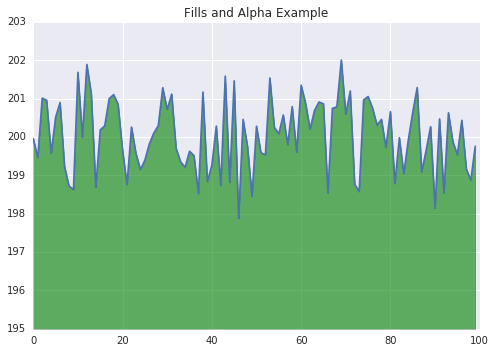

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Fills and Alpha Example")
plt.show()

# Integration with Drive

Colaboratory is integrated with Google Drive. It allows you to share, comment, and collaborate on the same document with multiple people:

* The **SHARE** button (top-right of the toolbar) allows you to share the notebook and control permissions set on it.

* **File->Make a Copy** creates a copy of the notebook in Drive.

* **File->Save** saves the File to Drive. **File->Save and checkpoint** pins the version so it doesn't get deleted from the revision history. 

* **File->Revision history** shows the notebook's revision history. 

## Commenting on a cell
You can comment on a Colaboratory notebook like you would on a Google Document. Comments are attached to cells, and are displayed next to the cell they refer to. If you have **comment-only** permissions, you will see a comment button on the top right of the cell when you hover over it.

If you have edit or comment permissions you can comment on a cell in one of three ways: 

1. Select a cell and click the comment button in the toolbar above the top-right corner of the cell.
1. Right click a text cell and select **Add a comment** from the context menu.
3. Use the shortcut **Ctrl+Shift+M** to add a comment to the currently selected cell. 

You can resolve and reply to comments, and you can target comments to specific collaborators by typing *+[email address]* (e.g., `+user@domain.com`). Addressed collaborators will be emailed. 

The Comment button in the top-right corner of the page shows all comments attached to the notebook.